In [64]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [65]:
# file path
file_path = "~/buckets/b1/exp/HT4220F/HT4220F.txt"

In [66]:
# load data
df = pl.read_csv(file_path, separator='\t', ignore_errors=True)
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
str,str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
"""20240923 225459""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.286317,9494,0.567355,11059,15172,47,778.195112,278.990876,0.488402,692,408,0.429989,0.327838,62.127564,-3.507e7,1
"""20240923 225633""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.161943,5177,0.287002,12086,19778,81,624.899196,522.740796,0.437714,378,582,0.356381,0.298376,43.009588,-4.5765e7,2
"""20240923 225739""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.295693,6858,0.673175,3459,4977,38,730.768914,430.027987,0.081353,210,497,0.654938,0.653415,80.869461,-1.2285e7,3
"""20240923 225916""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.220712,7366,0.218681,2029,24654,36,733.195474,730.224988,0.723675,366,611,0.547406,0.760216,26.936372,-5.703e7,4
"""20240923 230121""","""binary""","""custom""",true,true,false,-100,31,80,true,173249,0.098199,2302,0.628864,7057,20370,117,510.365523,503.907452,0.615154,298,522,0.813705,0.483241,72.485217,1.065e7,5


In [67]:
# convert 'fecha' to datetime
df = df.with_columns(pl.col('fecha').str.strptime(pl.Datetime, "%Y%m%d %H%M%S"))
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-23 22:54:59,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.286317,9494,0.567355,11059,15172,47,778.195112,278.990876,0.488402,692,408,0.429989,0.327838,62.127564,-3.507e7,1
2024-09-23 22:56:33,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.161943,5177,0.287002,12086,19778,81,624.899196,522.740796,0.437714,378,582,0.356381,0.298376,43.009588,-4.5765e7,2
2024-09-23 22:57:39,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.295693,6858,0.673175,3459,4977,38,730.768914,430.027987,0.081353,210,497,0.654938,0.653415,80.869461,-1.2285e7,3
2024-09-23 22:59:16,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.220712,7366,0.218681,2029,24654,36,733.195474,730.224988,0.723675,366,611,0.547406,0.760216,26.936372,-5.703e7,4
2024-09-23 23:01:21,"""binary""","""custom""",true,true,false,-100,31,80,true,173249,0.098199,2302,0.628864,7057,20370,117,510.365523,503.907452,0.615154,298,522,0.813705,0.483241,72.485217,1.065e7,5


In [68]:
# calculate runtime
runtime = round((df['fecha'].max() - df['fecha'].min()).total_seconds()/60/60,2)
runtime

1.14

In [69]:
# sort by 'ganancia' in descending order
df_sorted = df.sort('ganancia', descending=True).filter(pl.col('ganancia').is_not_null())
df_sorted.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-23 23:09:51,"""binary""","""custom""",true,true,false,-100,31,17,true,173249,0.198067,4219,0.147856,3045,13271,72,198.349548,240.622495,0.835647,881,872,0.754426,0.683448,76.83583,5.187e7,11
2024-09-23 23:13:36,"""binary""","""custom""",true,true,false,-100,31,7,true,173249,0.466974,3519,0.753715,4507,11281,116,78.130344,203.476245,0.943059,738,198,0.479553,0.593466,110.158655,5.136e7,14
2024-09-23 23:35:25,"""binary""","""custom""",true,true,false,-100,31,34,true,173249,0.252154,8208,0.972918,13243,12364,79,65.450748,749.086007,0.320974,794,215,0.604513,0.105655,11.612411,5.1e7,26
2024-09-23 23:21:28,"""binary""","""custom""",true,true,false,-100,31,12,true,173249,0.340301,1132,0.828496,14184,10506,49,316.028222,788.570402,0.679232,528,767,0.853105,0.620075,38.295337,4.9365e7,20
2024-09-23 23:08:15,"""binary""","""custom""",true,true,false,-100,31,6,true,173249,0.435266,1807,0.799738,3862,11739,25,411.690186,841.29165,0.792438,872,324,0.521891,0.244102,65.876496,4.8195e7,10


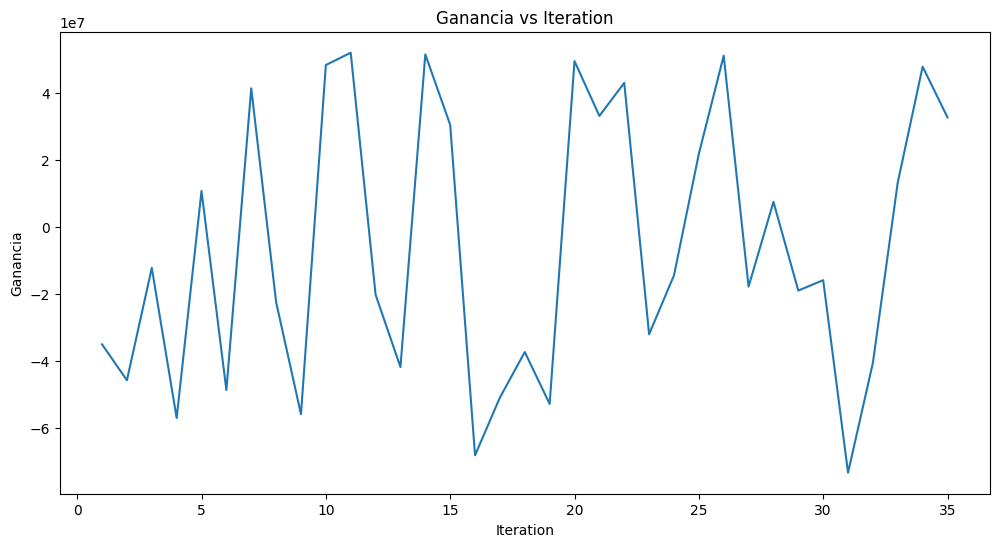

In [70]:
# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['iteracion'], y=df['ganancia'])
plt.title('Ganancia vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

In [71]:
# Find the row with the best ganancia
best_params = df_sorted.head(1).tail(1)
best_params

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-23 23:09:51,"""binary""","""custom""",true,true,false,-100,31,17,true,173249,0.198067,4219,0.147856,3045,13271,72,198.349548,240.622495,0.835647,881,872,0.754426,0.683448,76.83583,5.187e7,11


In [72]:
# List of all parameters we searched through
params = [
    'learning_rate', 'num_leaves', 'feature_fraction', 'min_data_in_leaf',
    'envios', 'max_depth', 'lambda_l1', 'lambda_l2', 'bagging_fraction',
    'bagging_freq', 'min_child_samples', 'subsample', 'colsample_bytree',
    'min_gain_to_split'
]

# Generate R code for the best parameters
r_code = "# Best hyperparameters\n"
for param in params:
    if param in best_params.columns:
        value = best_params[param][0]
        if isinstance(value, float):
            r_code += f"PARAM$finalmodel${param} <- {value:.6f}\n"
        elif isinstance(value, int):
            r_code += f"PARAM$finalmodel${param} <- {value}L\n"
        else:
            r_code += f"PARAM$finalmodel${param} <- {value}\n"
    else:
        r_code += f"# Warning: {param} not found in the results\n"

In [73]:
print(r_code)

# Best hyperparameters
PARAM$finalmodel$learning_rate <- 0.198067
PARAM$finalmodel$num_leaves <- 4219L
PARAM$finalmodel$feature_fraction <- 0.147856
PARAM$finalmodel$min_data_in_leaf <- 3045L
PARAM$finalmodel$envios <- 13271L
PARAM$finalmodel$max_depth <- 72L
PARAM$finalmodel$lambda_l1 <- 198.349548
PARAM$finalmodel$lambda_l2 <- 240.622495
PARAM$finalmodel$bagging_fraction <- 0.835647
PARAM$finalmodel$bagging_freq <- 881L
PARAM$finalmodel$min_child_samples <- 872L
PARAM$finalmodel$subsample <- 0.754426
PARAM$finalmodel$colsample_bytree <- 0.683448
PARAM$finalmodel$min_gain_to_split <- 76.835830

